# Data Science Intern at Prodigy Infotech

Author - Pratham Uday Chandratre

Task-2: EDA of Titanic dataset

Language-Python

Software-Jupyter Notebook

## Step 1: Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\Prath\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Step 2: Load the dataset

In [2]:
# Assuming the dataset file is in the same directory as the Jupyter Notebook
titanic_data = pd.read_csv('titanic.csv')

## Step 3: Explore the dataset

In [3]:
# Display the first few rows of the dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Get an overview of the dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Generate summary statistics of the dataset
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Check the shape of the dataset (number of rows, number of columns)
titanic_data.shape

(891, 12)

## Step 4: Handle missing values

In [7]:
# Check for missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Handle missing values in specific columns (e.g., Age, Cabin, Embarked)
# For example, to fill missing values in the 'Age' column with the median:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

In [9]:
# Drop columns with excessive missing data (e.g., Cabin)
titanic_data.drop('Cabin', axis=1, inplace=True)

In [10]:
# Drop rows with missing values in specific columns (e.g., Embarked)
titanic_data.dropna(subset=['Embarked'], inplace=True)

## Step 5: Perform EDA and visualize the data

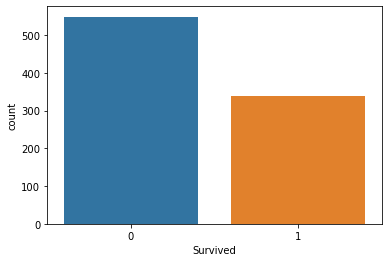

In [11]:
# Explore the distribution of the target variable (Survived)
sns.countplot(x='Survived', data=titanic_data)
plt.show()

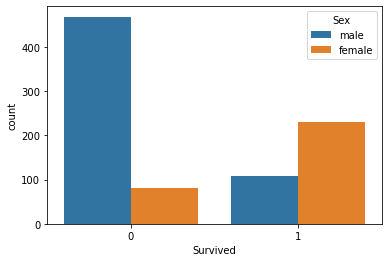

In [12]:
# Examine the relationship between variables (e.g., Survived vs. Sex)
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.show()

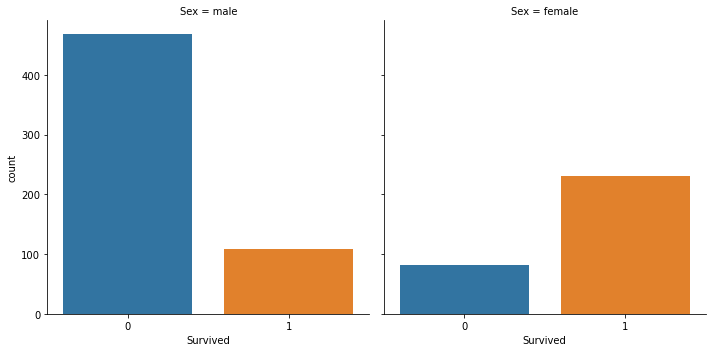

In [13]:
sns.catplot(x='Survived', col='Sex', kind='count', data=titanic_data)

plt.show()

In [14]:
titanic_data.groupby(['Sex']).Survived.sum()

Sex
female    231
male      109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

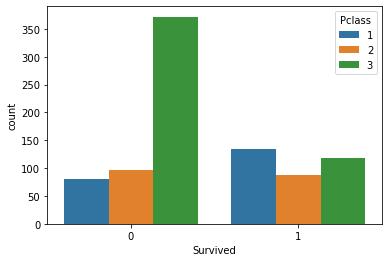

In [15]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

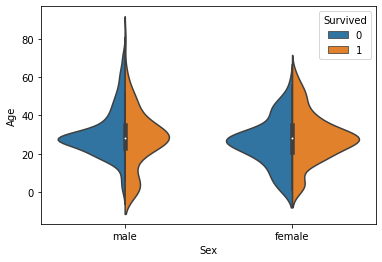

In [16]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=titanic_data,split=True)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

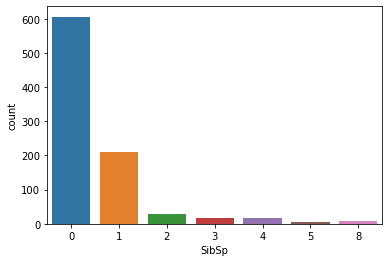

In [18]:
sns.countplot(x='SibSp',data=titanic_data)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

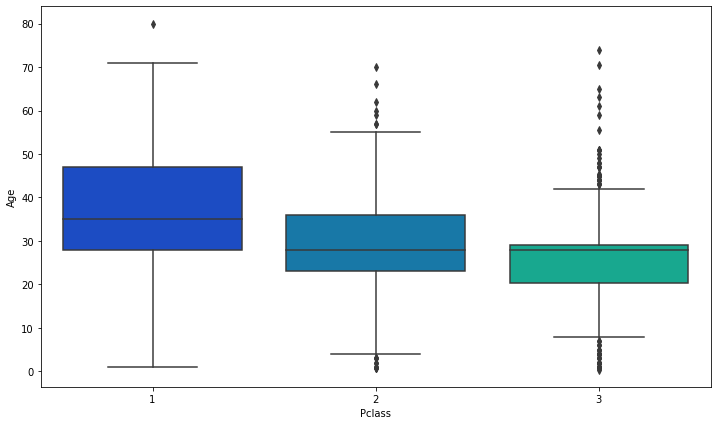

In [19]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=titanic_data,palette='winter')

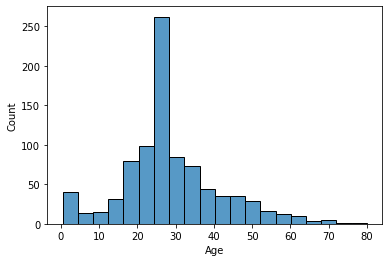

In [20]:
# Analyze the age distribution of passengers
sns.histplot(titanic_data['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

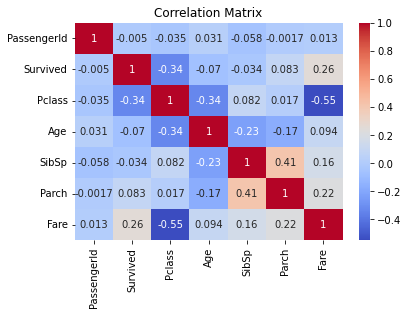

In [21]:
# Calculate and visualize the correlation between numerical features
correlation = titanic_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

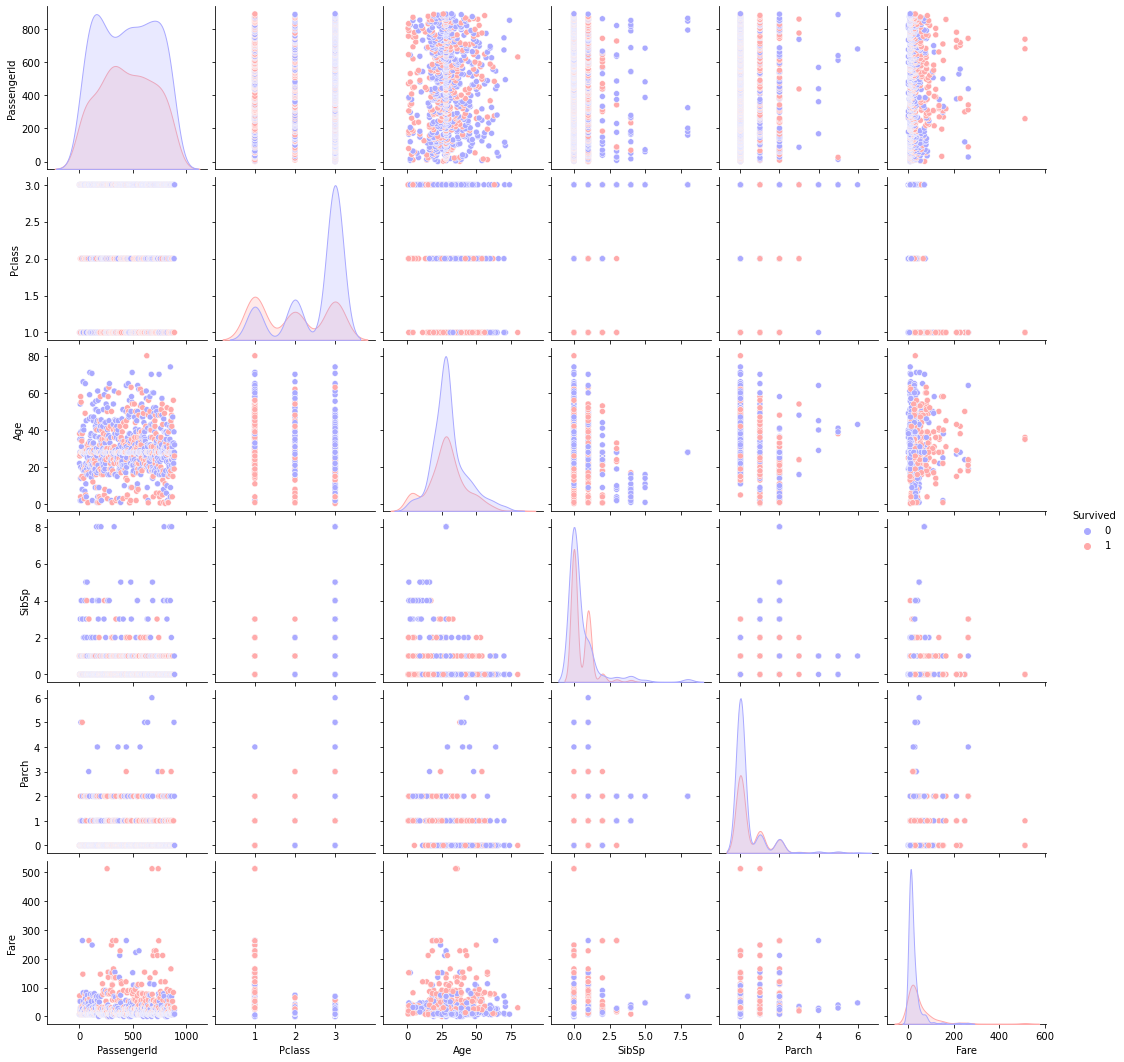

In [22]:
# Plotting pairplot
sns.pairplot(titanic_data,hue='Survived',palette='bwr')
plt.show()

In [23]:
embark=pd.get_dummies(titanic_data['Embarked'],drop_first=True)
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [24]:
titanic_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [25]:
titanic_data=pd.concat([titanic_data,sex,embark],axis=1)

In [26]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Thank You